<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana04_PO450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema da aula: Regressão
## Notas

**Previsão**: tem a ver com tempo; <br/>
**Predição**: Não tem a ver com tempo.<br/>





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy.linalg import inv

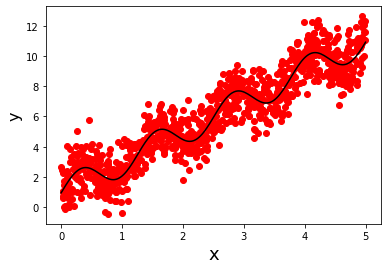

In [ ]:
N = 1000
x = 5*np.random.rand(N, 1)
noise = np.random.randn(N, 1)
y = 1*np.ones((N, 1))+2*x+np.sin(5*x)+1*noise

X_ext = np.concatenate((np.ones((N,1)),x,np.sin(5*x)), axis=1)

Aux_1 = inv(np.dot(np.transpose(X_ext),X_ext))
Aux_2 = np.dot(Aux_1,np.transpose(X_ext))
w = np.dot(Aux_2, y)

y_hat = np.dot(X_ext, w)
residual = y_hat-y
mse_error = np.power(residual,2).mean()

x_aux = np.linspace(0,5,200)
x_aux.resize(200,1)
X_aux = np.concatenate((np.ones((200,1)),x_aux, np.sin(5*x_aux)), axis=1)
y_aux = np.dot(X_aux,w)

plt.plot(x, y, 'ro')
plt.plot(x_aux, y_aux, 'k')
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 16)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
N = 1000
x = 5*np.random.rand(N, 1)
noise = np.random.randn(N, 1)
y = 1*np.ones((N, 1))+2*x+np.sin(5*x)+1*noise

X = np.concatenate((np.ones((N,1)),x,np.sin(5*x)), axis=1)

reg = LinearRegression().fit(X,y)
reg.score(X, y)
print(reg.coef_)
print(reg.intercept_)

[[0.         2.01074643 0.95540267]]
[0.96082928]


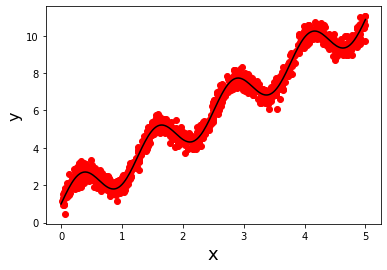

In [1]:
"""
PO450 - Introducao ao Aprendizado de Maquina
Exemplo de Regressao Nao-linear
"""

# Importanto pacotes
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

# Geracao de dados sinteticos
N = 1000 # Numero de amostras
x = 5*np.random.rand(N,1) # Geracao de amostras de uma uniforme no intervalo [0,5] - Variavel independente (entrada)
noise = np.random.randn(N, 1) # Geracao de ruido Gaussiano
y = 1.*np.ones((N, 1)) +  2*x + np.sin(5*x) + 0.3*noise # Variavel dependente (saida)

# Regressao LS
Z = np.concatenate((np.ones((N, 1)),x,np.sin(5*x)), axis=1) # Formacao da matrix de dados Z

# Estimacao de w pela pseudo-inversa (solucao de LS)
Aux_1 = inv(np.dot(np.transpose(Z),Z))
Pseudo_Z = np.dot(Aux_1,np.transpose(Z))
w = np.dot(Pseudo_Z,y) 

# Calculando saida predita, residuo e erro quadratico medio (MSE)
y_hat = np.dot(Z,w) # saida predita
residual = y_hat-y # calculo do residuo 
mse_error = np.power(residual,2).mean() # calculo do MSE

# Obtendo a curva referente ao modelo de regressao
x_aux = np.linspace(0,5,200)
x_aux.resize(200,1)
X_aux = np.concatenate((np.ones((200, 1)),x_aux,np.sin(5*x_aux)), axis=1)
y_aux = np.dot(X_aux,w)

# Plot da curva de regressao e das saidas observadas
plt.plot(x, y, 'ro')
plt.plot(x_aux, y_aux,'k')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
plt.show()